<a href="https://colab.research.google.com/github/Natkitta252603/Python_dataviz2024/blob/main/Group_HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path_movies = '/content/drive/MyDrive/data viz/IMDb Movies India.csv'

In [11]:
movies = pd.read_csv(path_movies, encoding='latin-1')
movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [12]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [13]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

<ipython-input-37-872e6af80972>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Year'] = movies['Year'].astype(str).str.replace('(','').str.replace(')','').astype(int)
<ipython-input-37-872e6af80972>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Votes'] = pd.to_numeric(movies['Votes'],errors='coerce')
<ipython-input-37-872e6af80972>:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty

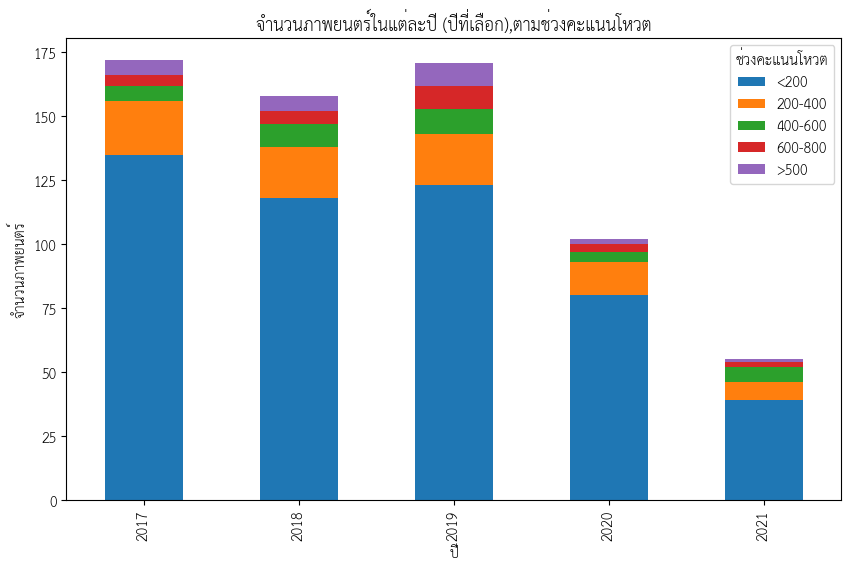

In [37]:
# กำจัดข้อมูลที่ไม่มีคะแนนโหวต
movies = movies.dropna(subset=['Votes','Year'])

#แปลงคอลัมม์ votes และ year เป็นตัวเลข
movies['Year'] = movies['Year'].astype(str).str.replace('(','').str.replace(')','').astype(int)
movies['Votes'] = pd.to_numeric(movies['Votes'],errors='coerce')

#สร้างช่วงคะแนนโหวตใหม่
bins = [0, 200,400,600,800,float('inf')]
labels = ['<200','200-400','400-600','600-800','>500']

#จัดกลุ่มคะแนนโหวตในช่วงที่กำหนด
movies.loc['Votes_Category'] = pd.cut(movies['Votes'], bins=bins, labels=labels)

#เลือกปีที่ต้องการ
selected_years = [2021, 2020, 2019, 2018, 2017]

#กรองข้อมูลเฉพาะปีที่เลือก
selected_movies = movies[movies['Year'].isin(selected_years)]

#นับจำนวนภาพยนตร์ในแต่ละช่วงคะแนนโหวตและแต่ละปี
vote_groups = selected_movies.groupby(['Year', 'Votes_Category'],observed=True).size().unstack(fill_value=0)

#lร้าง stacked bar chart
vote_groups.plot(kind='bar', stacked=True, figsize=(10, 6))

#เพิ่มชื่อแกนและชื่อกราฟ
# import the matplotlib.pyplot module and assign it to the alias plt
import matplotlib.pyplot as plt
plt.title('จำนวนภาพยนตร์ในแต่ละปี (ปีที่เลือก),ตามช่วงคะแนนโหวต')
plt.xlabel('ปี')
plt.ylabel('จำนวนภาพยนตร์')
plt.legend(title='ช่วงคะแนนโหวต')

#แสดงกราฟ
plt.show()